<a href="https://colab.research.google.com/github/karthika1498/gold_price_prediction/blob/main/gold_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyse the OHLC data of gold price and build a time series model to forecast future price
movements. Use time series analysis and data science methodologies to solve this problem.
The deliveries are model, accuracy metric like R2, Scatter plot of price_change vs model
price change, Scatter plot residual.

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

In [99]:
from google.colab import files
uploaded=files.upload()

Saving GOLD_DATA_EXCEL.xlsx - GOLD_DATA.csv to GOLD_DATA_EXCEL.xlsx - GOLD_DATA (1).csv


In [100]:
gold=pd.read_csv("GOLD_DATA_EXCEL.xlsx - GOLD_DATA.csv")
gold.head()


Date    Close     Open     High      Low
0  1/1/2008  113.052  113.402  113.699  112.377
1  2/1/2008  116.020  114.252  116.681  114.252
2  3/1/2008  117.247  117.072  117.760  115.628
3  4/1/2008  116.789  116.708  117.612  115.615
4  7/1/2008  116.289  116.721  117.072  115.817

In [101]:
gold.tail()

Date     Close      Open      High       Low
3701   9/3/2022  218.5818  226.6545  227.2323  217.8391
3702  10/3/2022  219.9612  217.7383  221.4943  217.5890
3703  11/3/2022  218.2969  219.9041  219.9480  215.7610
3704  14/3/2022  215.6744  217.5508  218.0665  214.7527
3705  15/3/2022  212.8763  213.6992  214.2479  212.0862

In [102]:
gold.shape

(3706, 5)

In [103]:
gold[gold.duplicated()]

Empty DataFrame
Columns: [Date, Close, Open, High, Low]
Index: []

In [104]:
gold.isnull().sum()

Date     0
Close    0
Open     0
High     0
Low      0
dtype: int64

descriptive statistics

In [105]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3706 non-null   object 
 1   Close   3706 non-null   float64
 2   Open    3706 non-null   float64
 3   High    3706 non-null   float64
 4   Low     3706 non-null   float64
dtypes: float64(4), object(1)
memory usage: 144.9+ KB


In [106]:
gold.describe()

Close         Open         High          Low
count  3706.000000  3706.000000  3706.000000  3706.000000
mean    166.090737   166.108982   167.126910   165.012608
std      30.112189    30.106569    30.212796    29.947291
min      92.435000    91.127000    95.095000    91.114000
25%     147.727925   147.702625   148.674475   146.880425
50%     159.806800   159.871700   160.626150   158.847350
75%     194.416125   194.479025   195.798950   192.916550
max     241.734000   242.398400   244.200000   238.437500

In [107]:
gold['Date'] = pd.to_datetime(gold['Date'], format='%d/%m/%Y')
gold

Date     Close      Open      High       Low
0    2008-01-01  113.0520  113.4020  113.6990  112.3770
1    2008-01-02  116.0200  114.2520  116.6810  114.2520
2    2008-01-03  117.2470  117.0720  117.7600  115.6280
3    2008-01-04  116.7890  116.7080  117.6120  115.6150
4    2008-01-07  116.2890  116.7210  117.0720  115.8170
...         ...       ...       ...       ...       ...
3701 2022-03-09  218.5818  226.6545  227.2323  217.8391
3702 2022-03-10  219.9612  217.7383  221.4943  217.5890
3703 2022-03-11  218.2969  219.9041  219.9480  215.7610
3704 2022-03-14  215.6744  217.5508  218.0665  214.7527
3705 2022-03-15  212.8763  213.6992  214.2479  212.0862

[3706 rows x 5 columns]

In [108]:
gold=gold.set_index('Date')
gold

Close      Open      High       Low
Date                                              
2008-01-01  113.0520  113.4020  113.6990  112.3770
2008-01-02  116.0200  114.2520  116.6810  114.2520
2008-01-03  117.2470  117.0720  117.7600  115.6280
2008-01-04  116.7890  116.7080  117.6120  115.6150
2008-01-07  116.2890  116.7210  117.0720  115.8170
...              ...       ...       ...       ...
2022-03-09  218.5818  226.6545  227.2323  217.8391
2022-03-10  219.9612  217.7383  221.4943  217.5890
2022-03-11  218.2969  219.9041  219.9480  215.7610
2022-03-14  215.6744  217.5508  218.0665  214.7527
2022-03-15  212.8763  213.6992  214.2479  212.0862

[3706 rows x 4 columns]

visualization

Text(0.5, 1.0, 'Low')

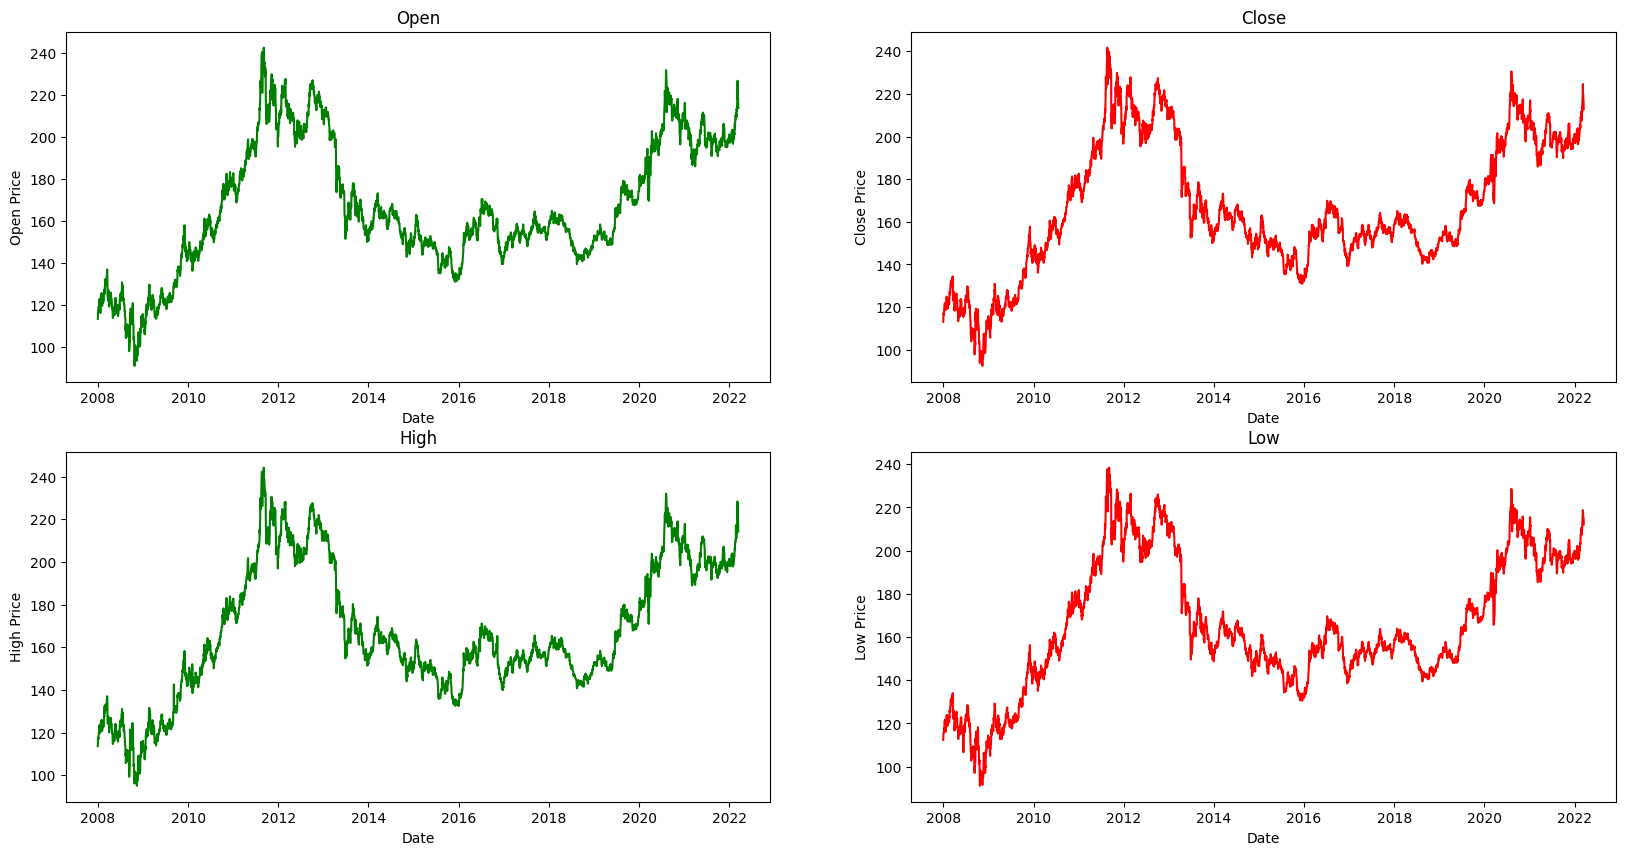

In [109]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(gold['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(gold['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(gold['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(gold['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

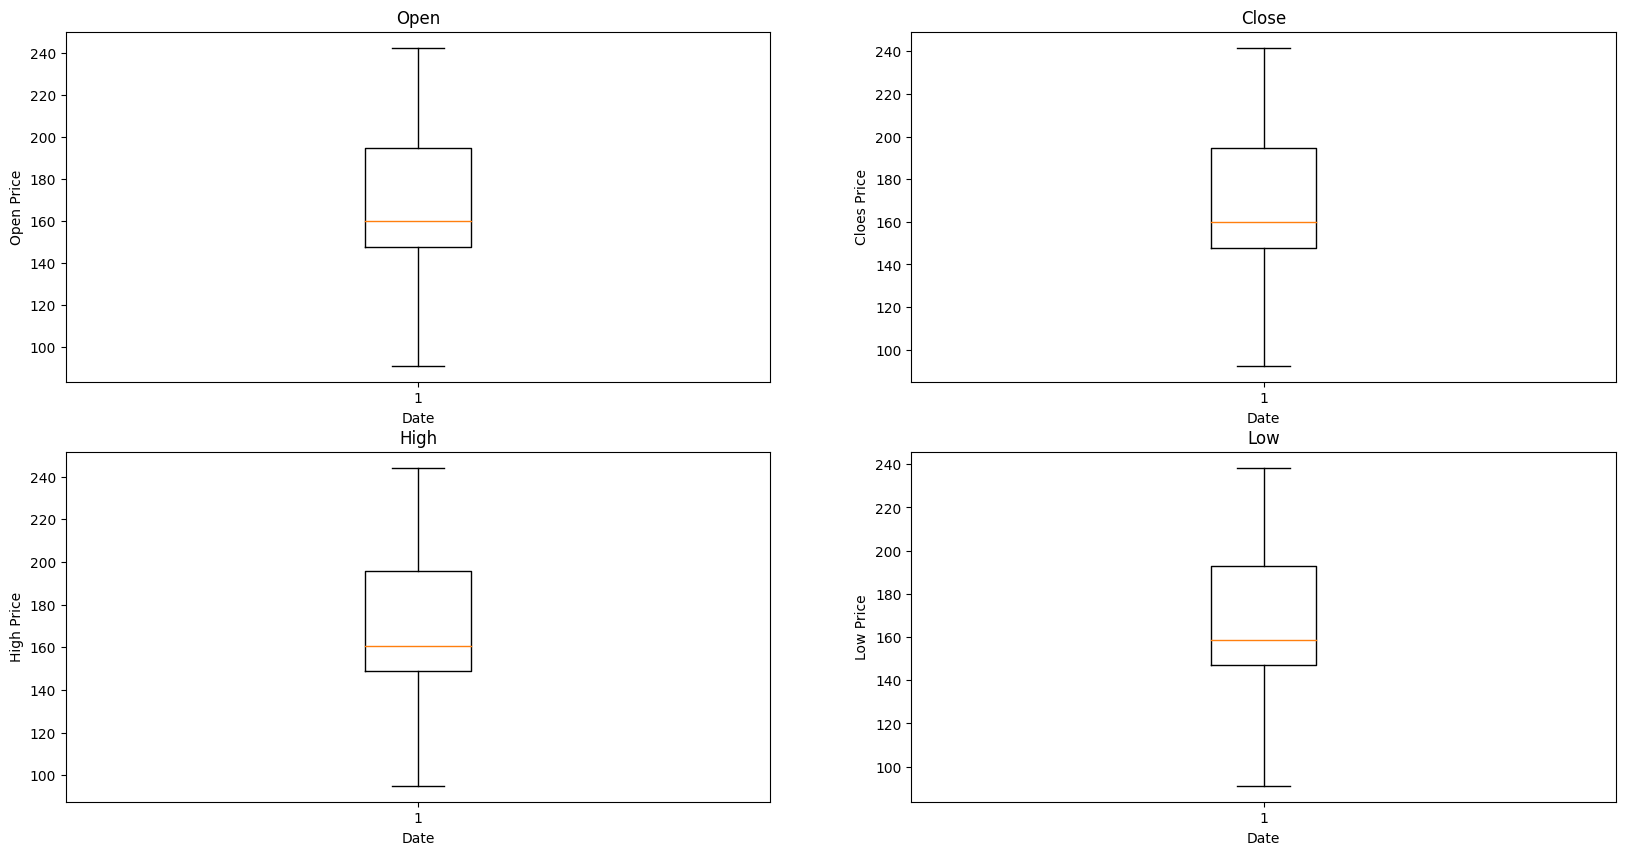

In [110]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(gold['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(gold['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(gold['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(gold['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')



Text(0.5, 1.0, 'Low')

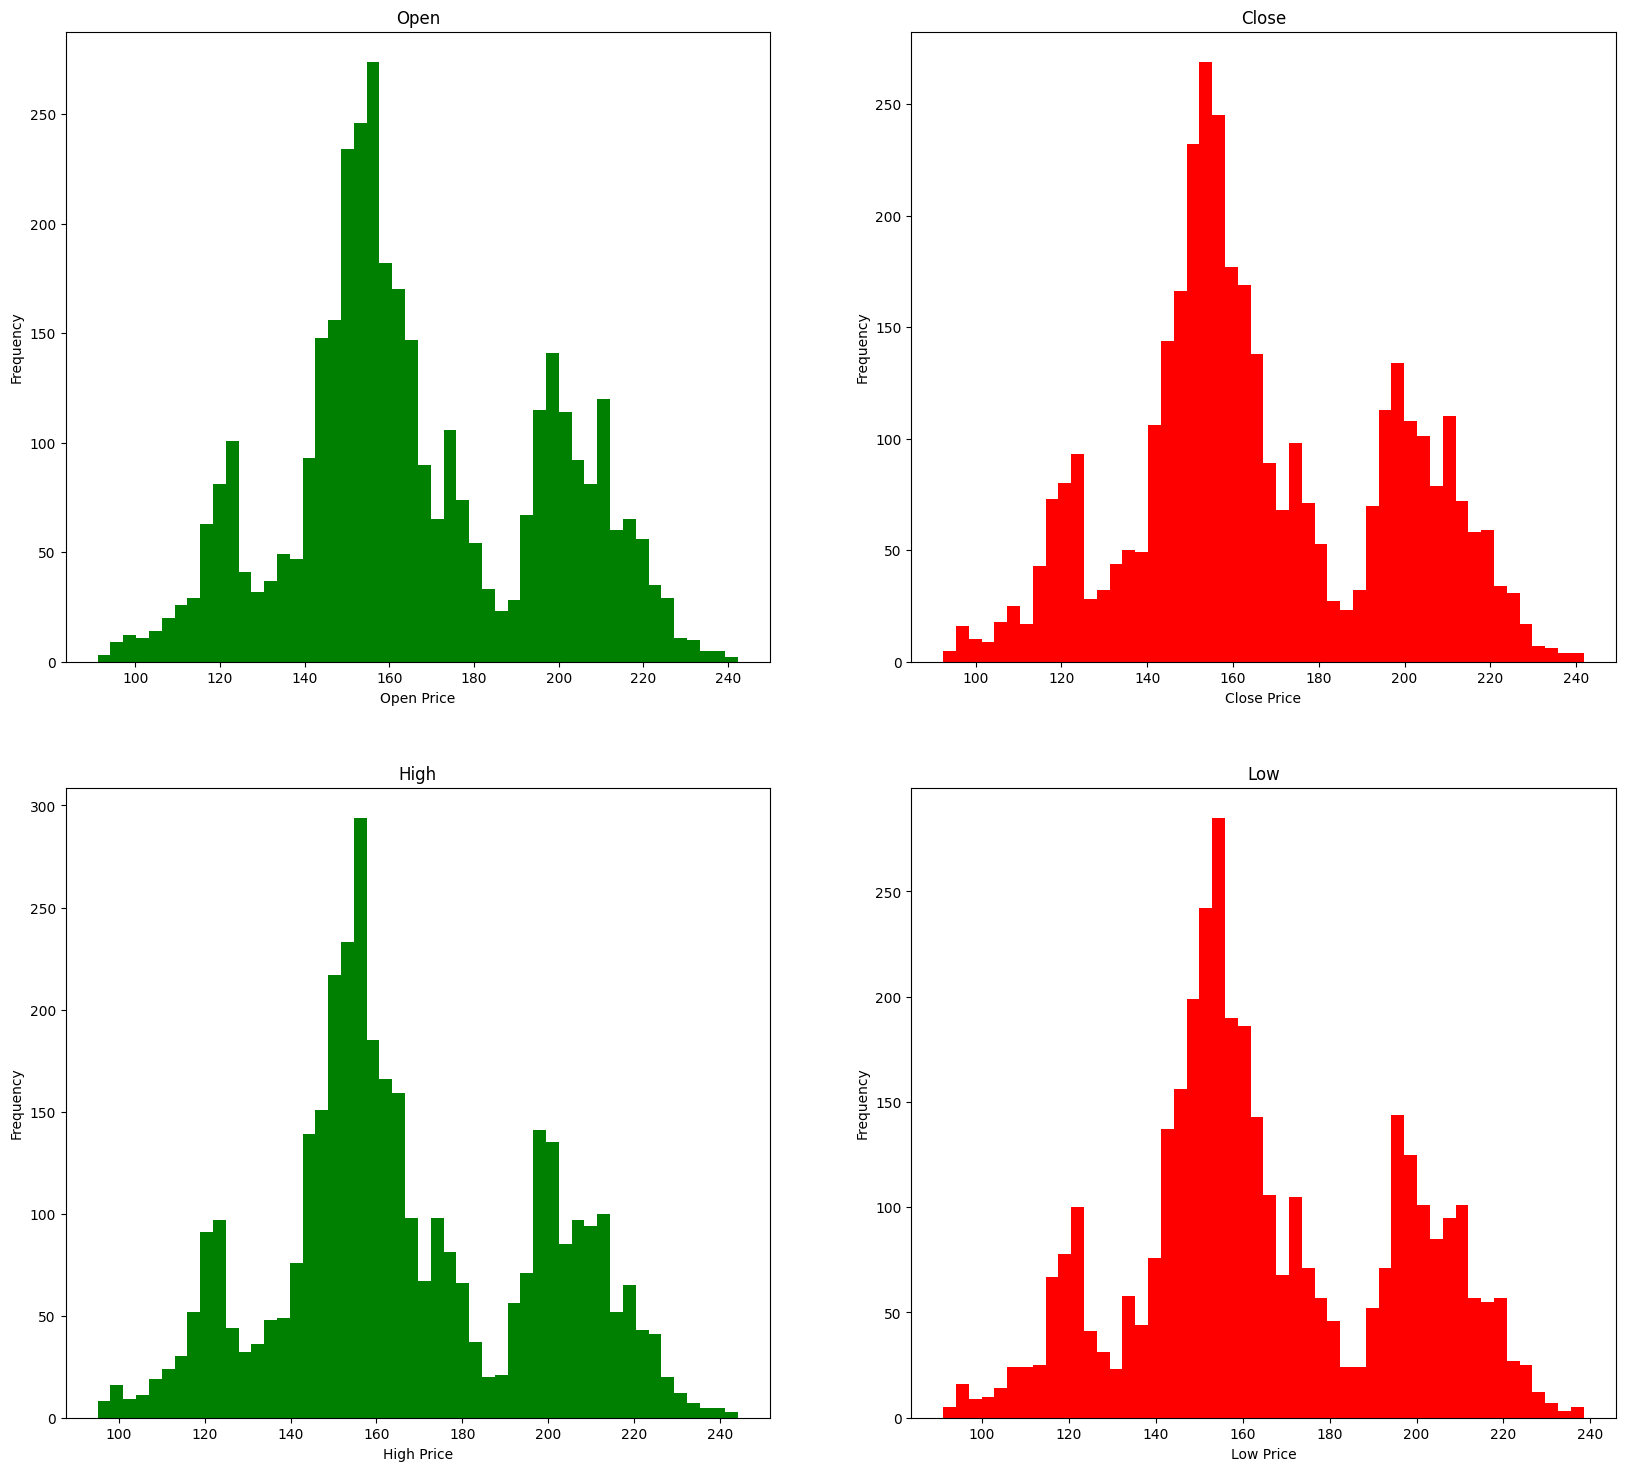

In [111]:
# Ploting Histogram
plt.figure(figsize=(20,18))
#Plot 1
plt.subplot(2,2,1)
plt.hist(gold['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.hist(gold['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.hist(gold['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.hist(gold['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

Text(0.5, 1.0, 'Low')

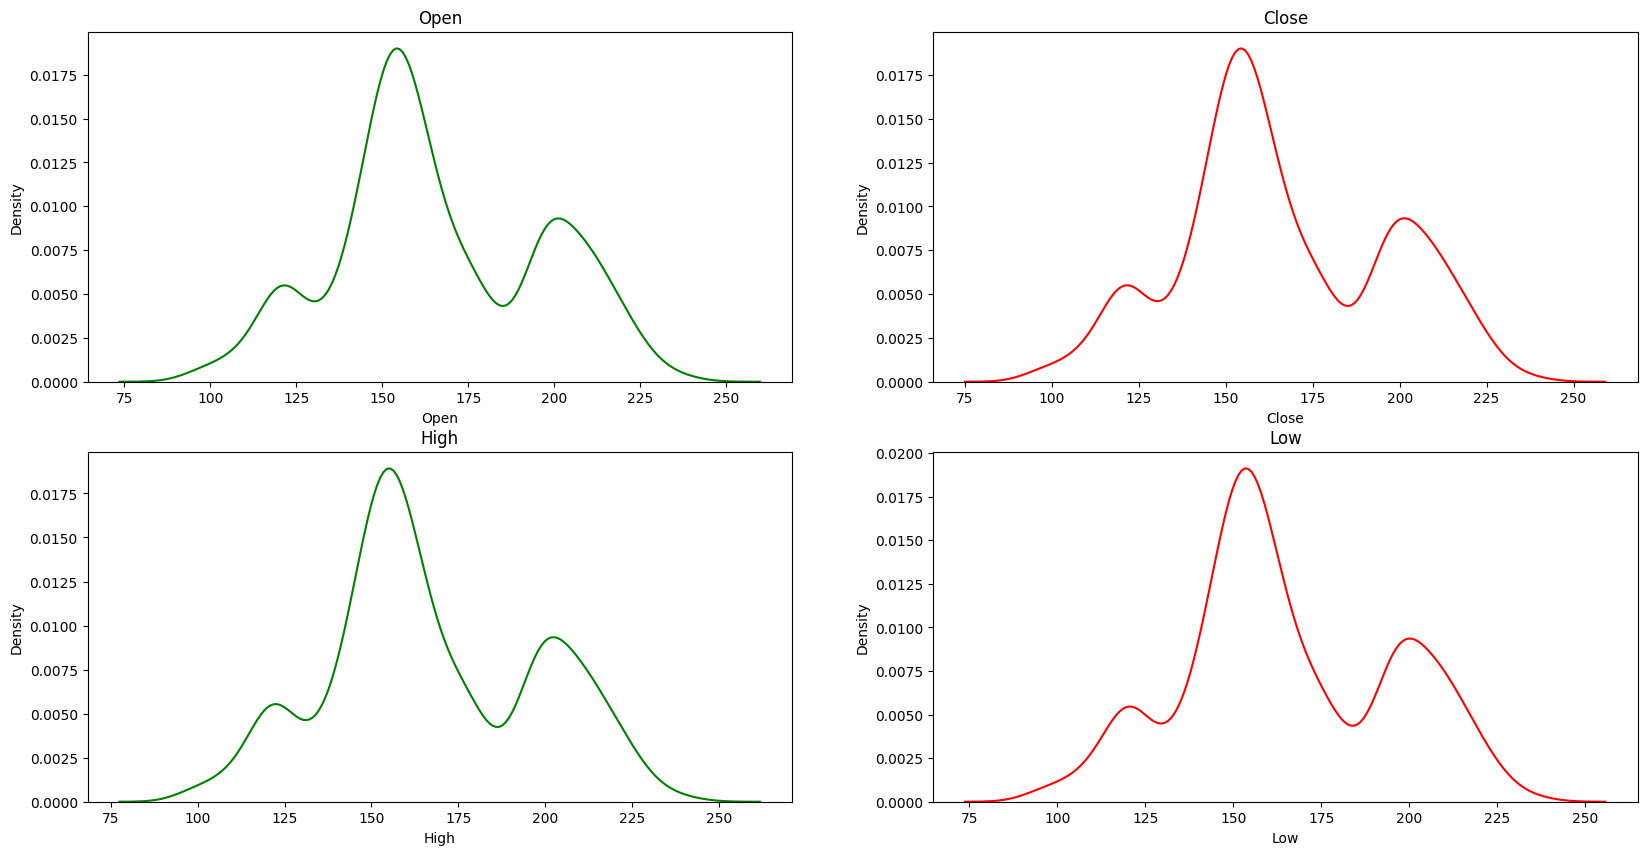

In [112]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(gold['Open'], color='green')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(gold['Close'], color='red')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
sns.kdeplot(gold['High'], color='green')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
sns.kdeplot(gold['Low'], color='red')
plt.title('Low')

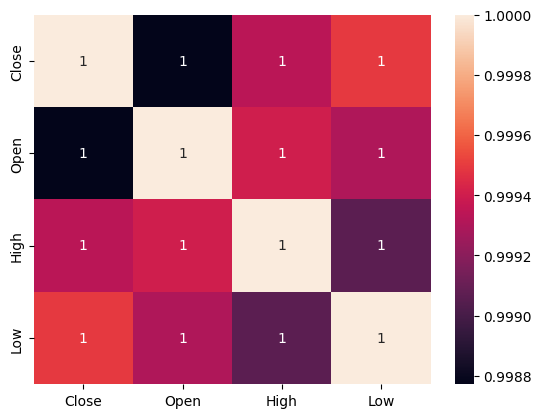

In [113]:
sns.heatmap(gold.corr(),annot=True)
plt.show()

<Axes: xlabel='Date'>

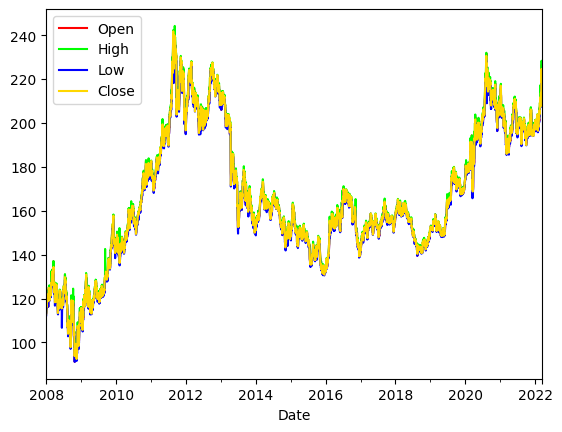

In [114]:
gold.plot(kind = "line", y = ['Open', 'High', 'Low','Close'],color=['#FF0000', '#00FF00', '#0000FF','#FFD700'])

decompositon

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose


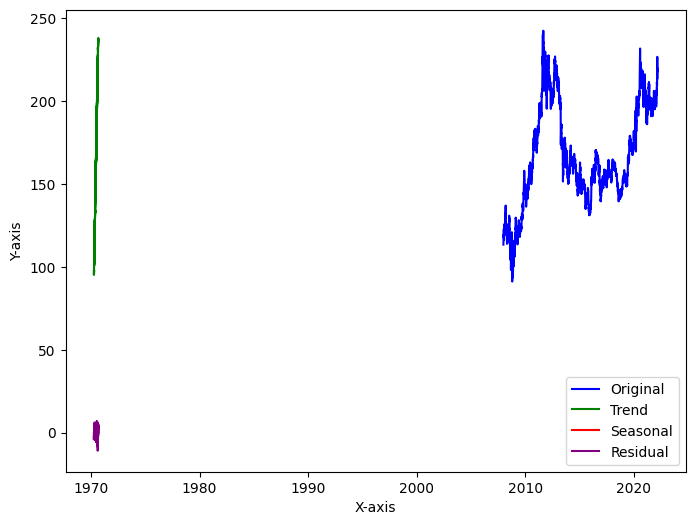

In [116]:
decomp = seasonal_decompose(gold['Open'], period=5)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(gold['Open'], color='blue', label='Original')
ax.plot(gold['Open'], decomp.trend, color='green', label='Trend')
ax.plot(gold['Open'], decomp.seasonal, color='red', label='Seasonal')
ax.plot(gold['Open'], decomp.resid, color='purple', label='Residual')

# Add labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.legend()

# Display the plot
plt.show()



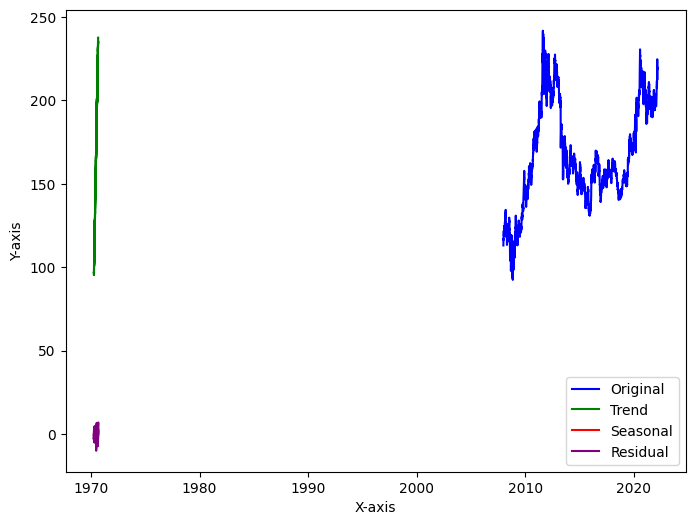

In [117]:
decomp = seasonal_decompose(gold['Close'], period=5)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(gold['Close'], color='blue', label='Original')
ax.plot(gold['Close'], decomp.trend, color='green', label='Trend')
ax.plot(gold['Close'], decomp.seasonal, color='red', label='Seasonal')
ax.plot(gold['Close'], decomp.resid, color='purple', label='Residual')

# Add labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.legend()

In [119]:
from statsmodels.tsa.stattools import adfuller

to check the stationarity

In [120]:
print("Result of Dickey-Fuller Test::")
dftest = adfuller(gold['Open'],autolag ='AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#lag Used', 'Number of Observation Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dftest[0] < dftest[4]['5%']:
  print ("Reject Ho - Time Series is Stationary")
else:
  print ("Failed to reject Ho - Time Series is Non-Stationary")

Result of Dickey-Fuller Test::
Test Statistics                 -1.935700
p-value                          0.315458
#lag Used                        0.000000
Number of Observation Used    3705.000000
Critical Value (1%)             -3.432116
Critical Value (5%)             -2.862320
Critical Value (10%)            -2.567185
dtype: float64
Failed to reject Ho - Time Series is Non-Stationary


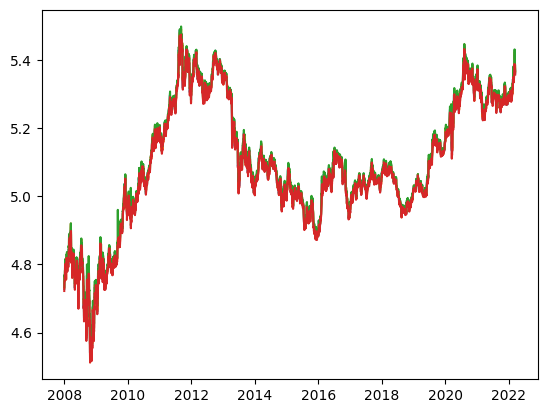

In [122]:
dk_logscale = np.log(gold)
plt.plot(dk_logscale)

In [123]:
MovingAvg =dk_logscale.rolling(window = 30).mean()
print(MovingAvg)

               Close      Open      High       Low
Date                                              
2008-01-01       NaN       NaN       NaN       NaN
2008-01-02       NaN       NaN       NaN       NaN
2008-01-03       NaN       NaN       NaN       NaN
2008-01-04       NaN       NaN       NaN       NaN
2008-01-07       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2022-03-09  5.330457  5.329043  5.337016  5.322108
2022-03-10  5.334075  5.331901  5.340431  5.325406
2022-03-11  5.337597  5.335431  5.343952  5.328650
2022-03-14  5.340534  5.338794  5.347186  5.331640
2022-03-15  5.342940  5.341388  5.349661  5.334019

[3706 rows x 4 columns]


Text(0.5, 1.0, 'Rollng Mean')

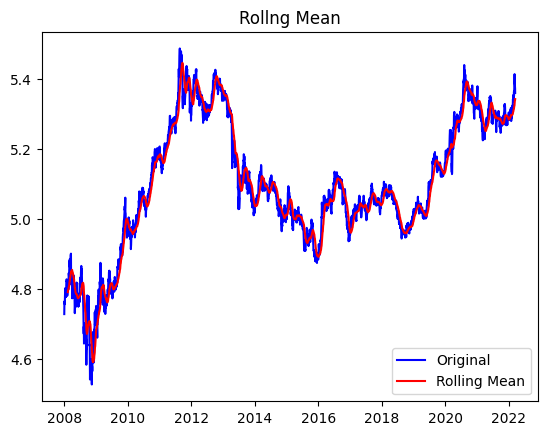

In [124]:
org = plt.plot(dk_logscale['Close'], color = 'blue', label ='Original')
mean = plt.plot(MovingAvg['Close'], color = 'red', label ='Rolling Mean')
plt.legend(loc = 'best')
plt.title ('Rollng Mean')

In [125]:
logScaleMinusMovingAvg = dk_logscale - MovingAvg
logScaleMinusMovingAvg.head()

logScaleMinusMovingAvg.dropna(inplace=True)
logScaleMinusMovingAvg.head()

Close      Open      High       Low
Date                                              
2008-02-11  0.030126  0.033011  0.025350  0.031703
2008-02-12  0.010619  0.020426  0.017016  0.015537
2008-02-13  0.007989  0.001391  0.004534  0.007189
2008-02-14  0.007344  0.007950  0.004607  0.009507
2008-02-15  0.000897  0.008807  0.006588  0.003456

In [127]:
def text_stationarity(test_stationarity):

    rollmean = test_stationarity.rolling(window = 30).mean()
    rollstd = test_stationarity.rolling(window = 30).std()

    #plot rolling statistics
    org = plt.plot(test_stationarity, color = 'Skyblue', label ='Original')
    mean = plt.plot(rollmean, color = 'Coral', label ='RollingMean')
    std = plt.plot(rollstd, color = 'black', label ='RollingStd')
    plt.legend(loc = 'best')
    plt.title ('Rollng mean & Standard Deviation')

    print("Result of Dickey-Fuller Test::")
    dftest = adfuller(test_stationarity,autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '#lag Used', 'Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    if dftest[0] < dftest[4]['5%']:
        print ("Reject Ho - Time Series is Stationary")
    else:
        print ("Failed to reject Ho - Time Series is Non-Stationary")

Result of Dickey-Fuller Test::
Test Statistics              -1.223603e+01
p-value                       1.027661e-22
#lag Used                     1.500000e+01
Number of Observation Used    3.661000e+03
Critical Value (1%)          -3.432137e+00
Critical Value (5%)          -2.862330e+00
Critical Value (10%)         -2.567190e+00
dtype: float64
Reject Ho - Time Series is Stationary


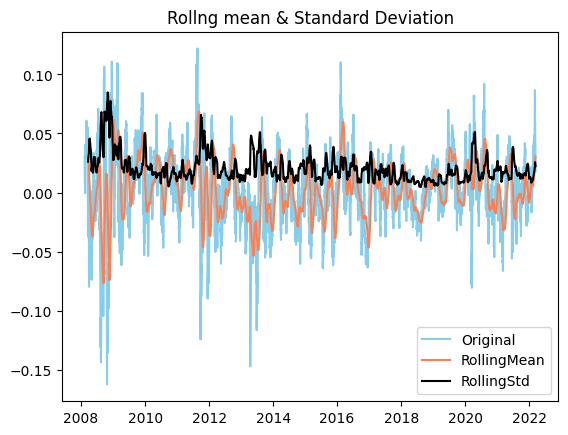

In [128]:
text_stationarity(logScaleMinusMovingAvg['Close'])

Exponential Decay Transformation

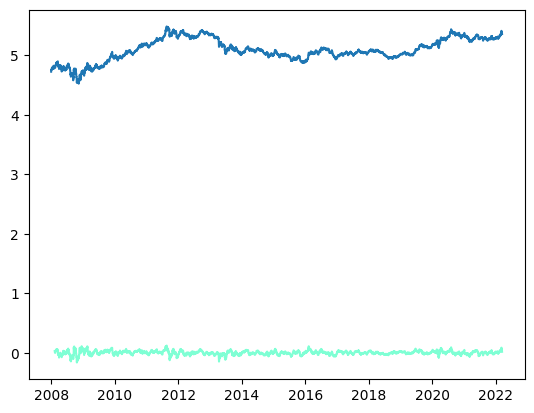

In [129]:
expDecayWtAvg = dk_logscale.ewm(halflife=30,adjust = True).mean()
plt.plot(dk_logscale['Close'])
plt.plot(logScaleMinusMovingAvg['Close'], color = '#7FFFD4')

In [130]:
expDecayWtAvg.head()

Close      Open      High       Low
Date                                              
2008-01-01  4.727848  4.730939  4.733555  4.721859
2008-01-02  4.740955  4.734716  4.746649  4.730228
2008-01-03  4.748911  4.744291  4.754152  4.737101
2008-01-04  4.751876  4.748271  4.757577  4.740507
2008-01-07  4.752756  4.750682  4.758668  4.742915

In [131]:
logScaleMinusexpMovingAvg = dk_logscale - expDecayWtAvg

Result of Dickey-Fuller Test::
Test Statistics              -7.017376e+00
p-value                       6.678616e-10
#lag Used                     1.300000e+01
Number of Observation Used    3.692000e+03
Critical Value (1%)          -3.432122e+00
Critical Value (5%)          -2.862323e+00
Critical Value (10%)         -2.567187e+00
dtype: float64
Reject Ho - Time Series is Stationary


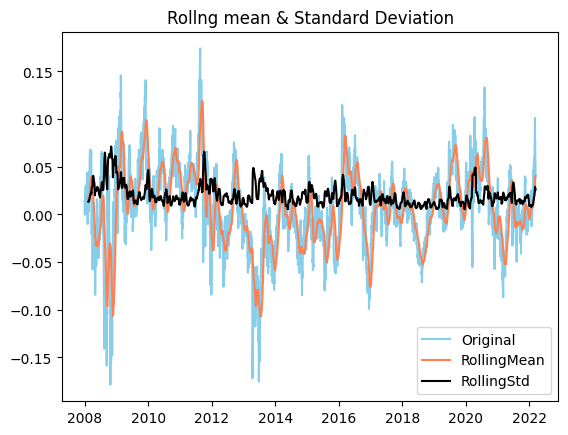

In [132]:
text_stationarity(logScaleMinusexpMovingAvg['Close'])

Time Shift transformation

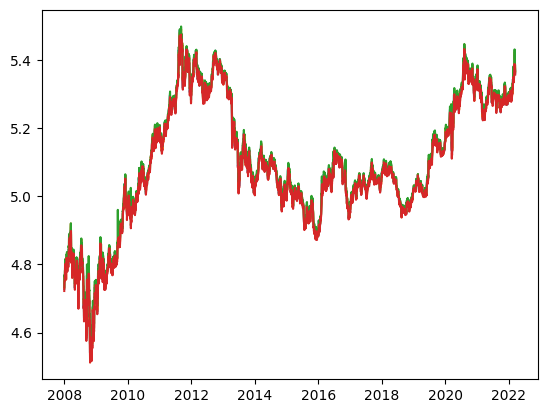

In [134]:
goldlogDiffShifting = dk_logscale - dk_logscale.shift()
plt.plot(dk_logscale)

Result of Dickey-Fuller Test::
Test Statistics              -1.737118e+01
p-value                       5.136656e-30
#lag Used                     1.200000e+01
Number of Observation Used    3.692000e+03
Critical Value (1%)          -3.432122e+00
Critical Value (5%)          -2.862323e+00
Critical Value (10%)         -2.567187e+00
dtype: float64
Reject Ho - Time Series is Stationary


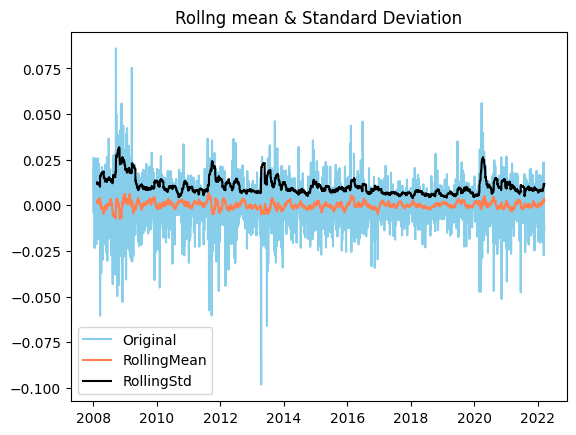

In [135]:
goldlogDiffShifting.dropna(inplace=True)
text_stationarity(goldlogDiffShifting['Close'])

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

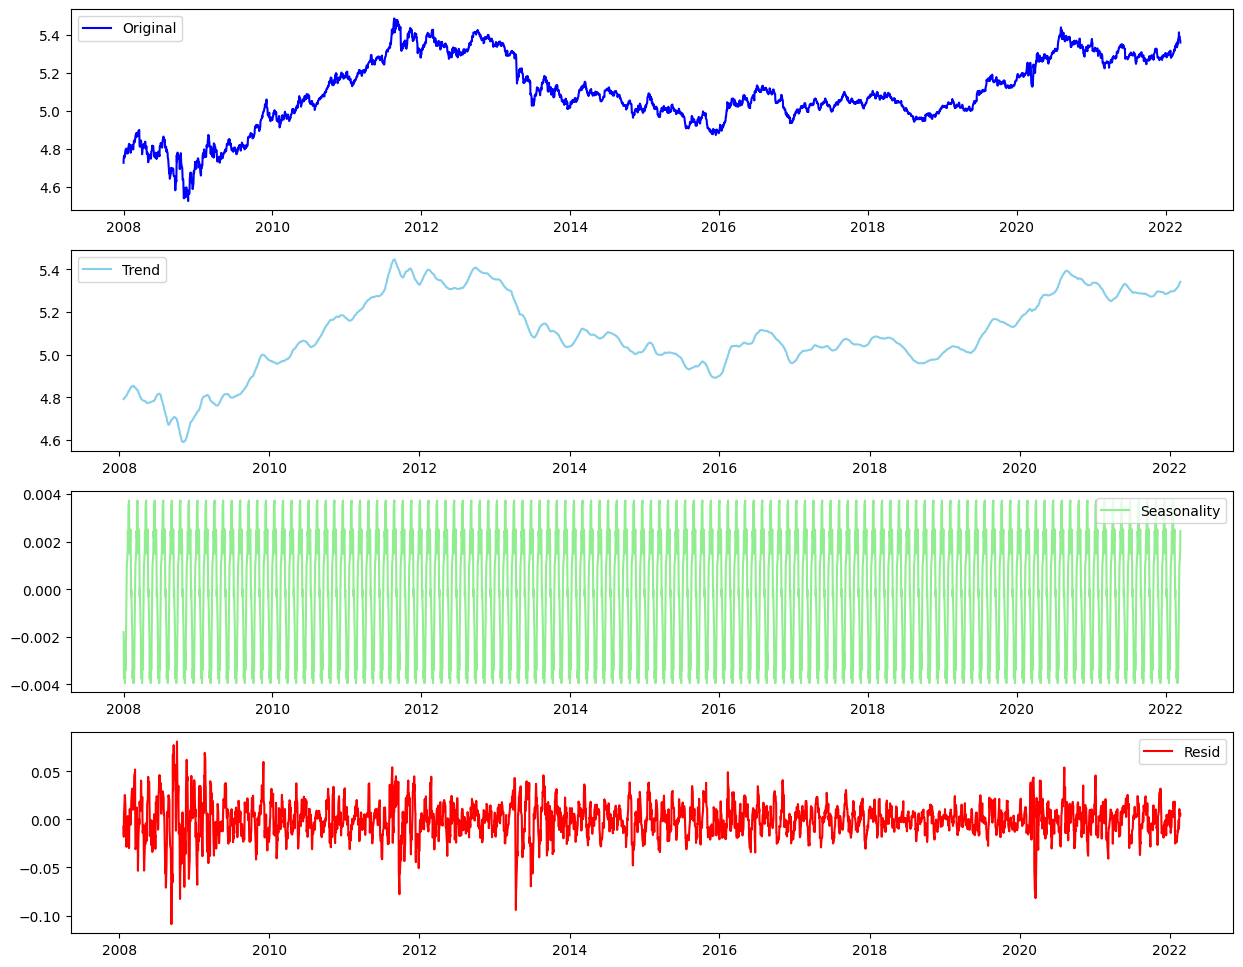

In [136]:
decomposition = seasonal_decompose(dk_logscale['Close'], period=30)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

figure=plt.figure(figsize=(15,12))
plt.subplot(411)
plt.plot(dk_logscale['Close'], color='blue',label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, color='Skyblue',label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal,color='Lightgreen', label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, color ='Red',label = 'Resid')
plt.legend(loc = 'best')

plt.tight_layout


Result of Dickey-Fuller Test::
Test Statistics              -1.586798e+01
p-value                       9.050821e-29
#lag Used                     3.000000e+01
Number of Observation Used    3.645000e+03
Critical Value (1%)          -3.432145e+00
Critical Value (5%)          -2.862333e+00
Critical Value (10%)         -2.567192e+00
dtype: float64
Reject Ho - Time Series is Stationary


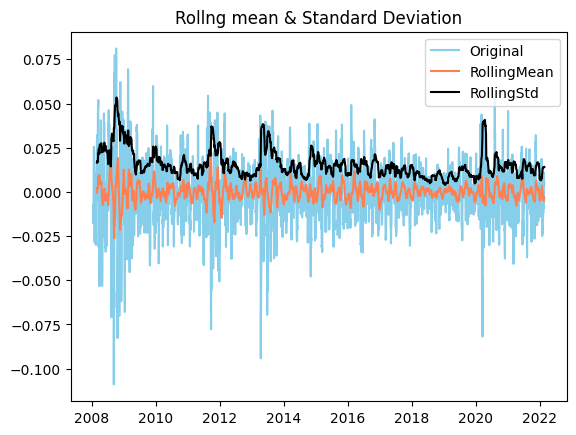

In [137]:
decomposedlogData = residual
decomposedlogData.dropna(inplace=True)
text_stationarity(decomposedlogData)

acf and pacf plot

In [138]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [139]:
lag_acf = acf(goldlogDiffShifting['Close'], nlags = 30)
lag_pacf = pacf(goldlogDiffShifting['Close'], nlags = 30 , method = 'ols')

In [140]:
np.round(lag_acf,2)

array([ 1.  ,  0.  , -0.02,  0.01, -0.02,  0.02, -0.05, -0.02, -0.  ,
        0.03, -0.01, -0.04, -0.01,  0.04,  0.01, -0.  , -0.01, -0.02,
       -0.02, -0.01, -0.  , -0.03,  0.03, -0.02, -0.03, -0.  , -0.01,
        0.  ,  0.  ,  0.02,  0.01])

In [141]:
np.round(lag_pacf,2)

array([ 1.  ,  0.  , -0.02,  0.01, -0.02,  0.02, -0.05, -0.02, -0.01,
        0.03, -0.02, -0.04, -0.01,  0.04,  0.01,  0.  , -0.01, -0.02,
       -0.02, -0.  ,  0.  , -0.03,  0.02, -0.02, -0.03, -0.  , -0.01,
       -0.  , -0.  ,  0.02,  0.01])

In [142]:
import statsmodels.api as sm

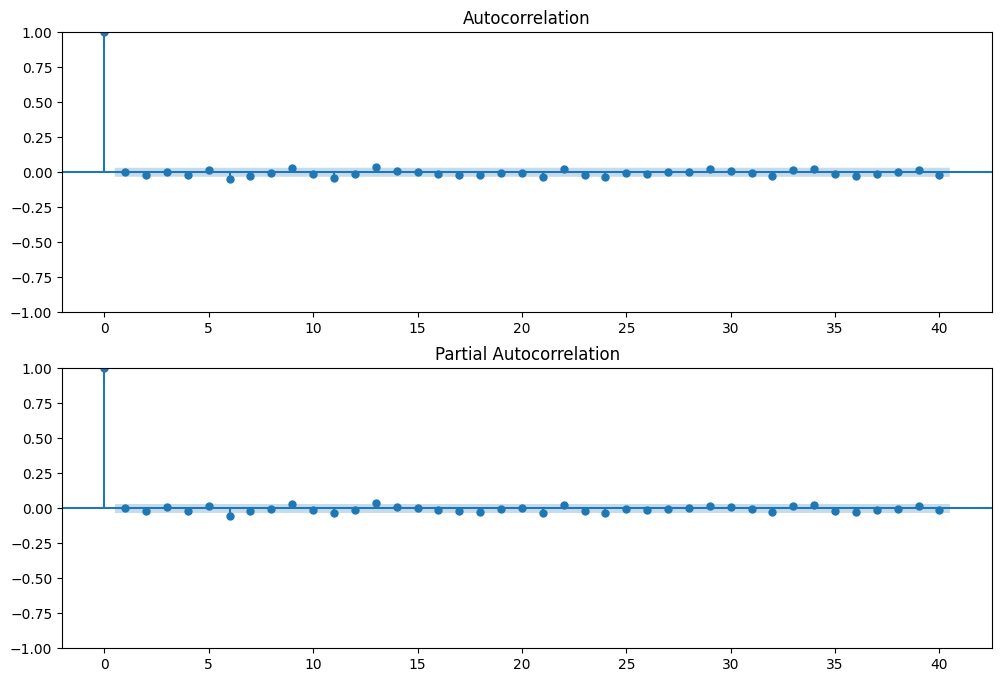

In [144]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(goldlogDiffShifting['Close'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(goldlogDiffShifting['Close'],lags=40,ax=ax2)

## Finding long-term and short-term trends
moving average

In [24]:
gold_ma=gold.copy()
gold_ma['30-day MA']=gold['Close'].rolling(window=30).mean()
gold_ma['200-day MA']=gold['Close'].rolling(window=200).mean()

In [25]:
gold_ma

Close      Open      High       Low   30-day MA  200-day MA
Date                                                                      
2008-01-01  113.0520  113.4020  113.6990  112.3770         NaN         NaN
2008-01-02  116.0200  114.2520  116.6810  114.2520         NaN         NaN
2008-01-03  117.2470  117.0720  117.7600  115.6280         NaN         NaN
2008-01-04  116.7890  116.7080  117.6120  115.6150         NaN         NaN
2008-01-07  116.2890  116.7210  117.0720  115.8170         NaN         NaN
...              ...       ...       ...       ...         ...         ...
2022-03-09  218.5818  226.6545  227.2323  217.8391  206.658443  199.770352
2022-03-10  219.9612  217.7383  221.4943  217.5890  207.412703  199.835469
2022-03-11  218.2969  219.9041  219.9480  215.7610  208.142267  199.881936
2022-03-14  215.6744  217.5508  218.0665  214.7527  208.748500  199.911534
2022-03-15  212.8763  213.6992  214.2479  212.0862  209.242777  199.929573

[3706 rows x 6 columns]

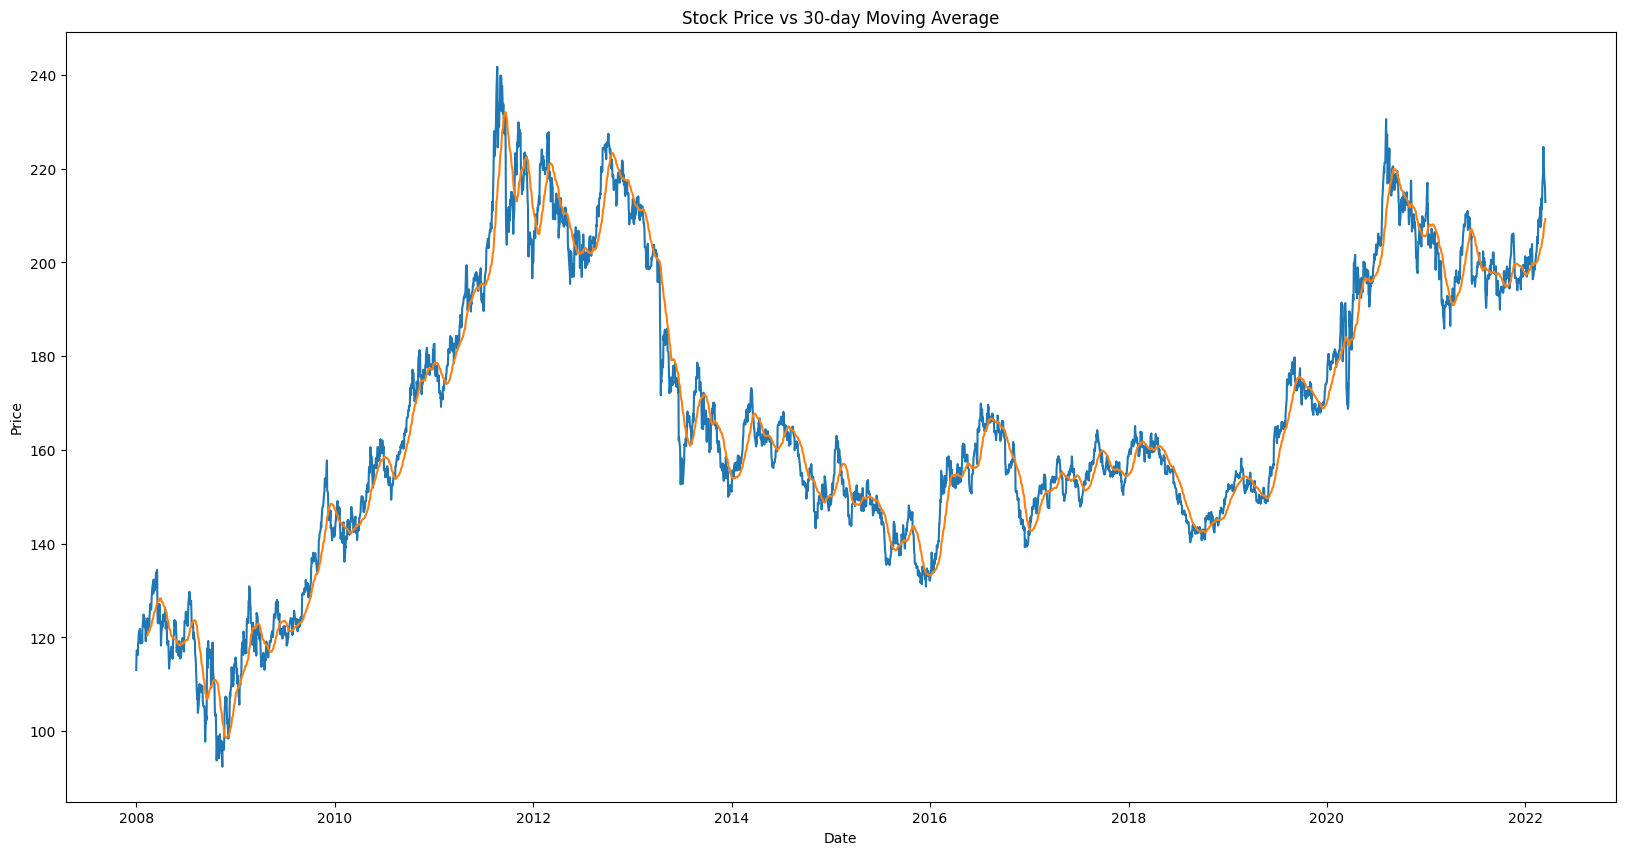

In [26]:
plt.figure(figsize=(20,10))
plt.plot(gold_ma['Close'],label='Original data')
plt.plot(gold_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

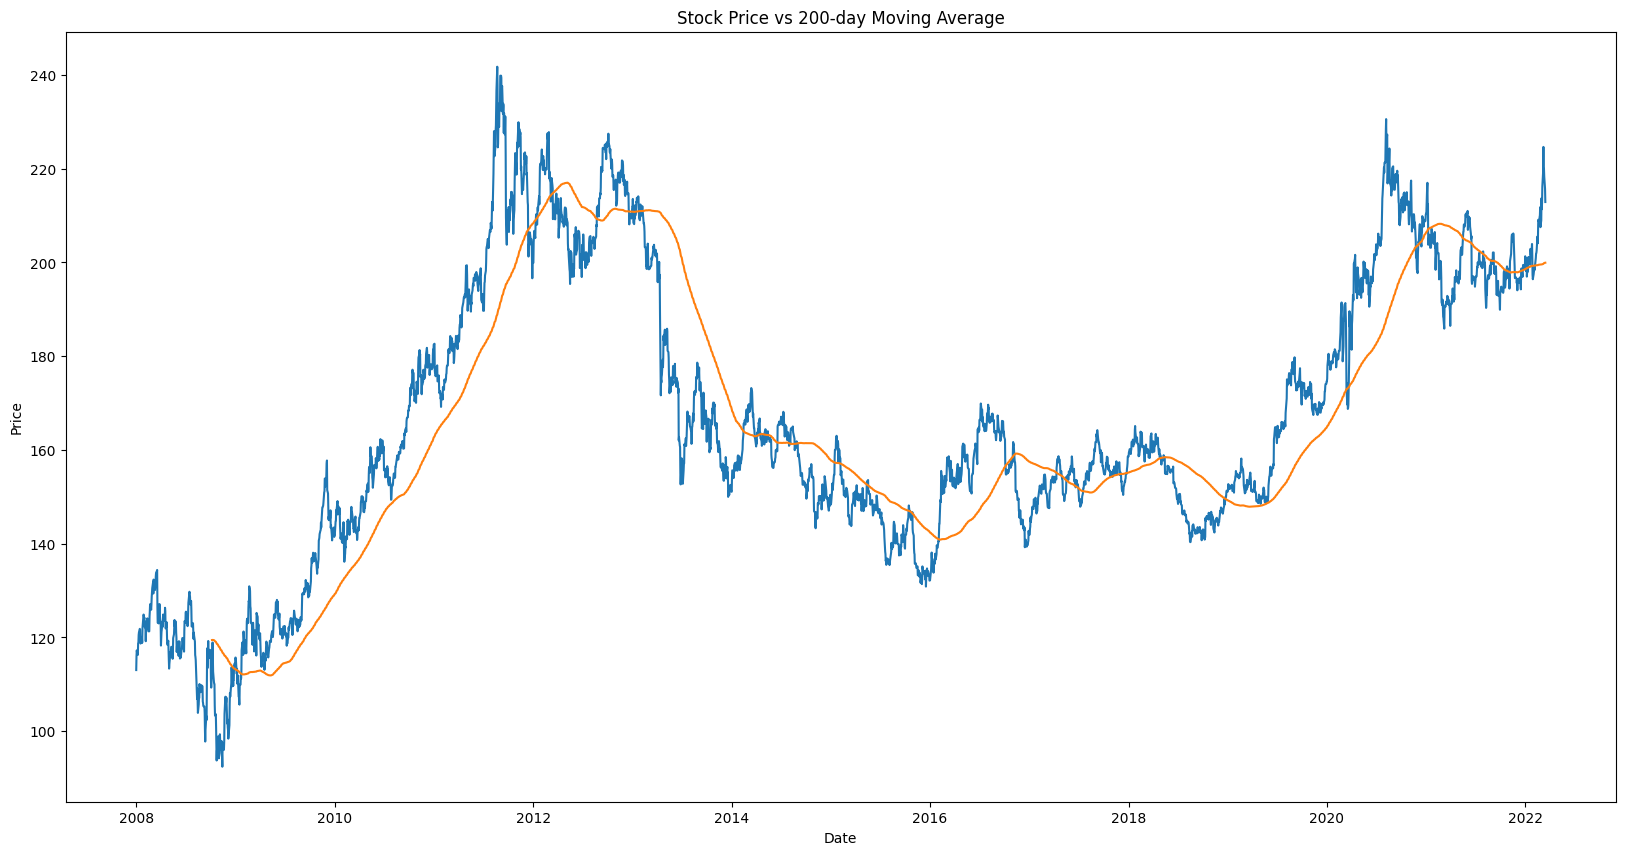

In [27]:
plt.figure(figsize=(20,10))
plt.plot(gold_ma['Close'],label='Original data')
plt.plot(gold_ma['200-day MA'],label='200-MA')
plt.legend
plt.title('Stock Price vs 200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


## model building

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [29]:
gold

Close      Open      High       Low
Date                                              
2008-01-01  113.0520  113.4020  113.6990  112.3770
2008-01-02  116.0200  114.2520  116.6810  114.2520
2008-01-03  117.2470  117.0720  117.7600  115.6280
2008-01-04  116.7890  116.7080  117.6120  115.6150
2008-01-07  116.2890  116.7210  117.0720  115.8170
...              ...       ...       ...       ...
2022-03-09  218.5818  226.6545  227.2323  217.8391
2022-03-10  219.9612  217.7383  221.4943  217.5890
2022-03-11  218.2969  219.9041  219.9480  215.7610
2022-03-14  215.6744  217.5508  218.0665  214.7527
2022-03-15  212.8763  213.6992  214.2479  212.0862

[3706 rows x 4 columns]

In [147]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(gold['Close'])
close_df


Close
Date                
2008-01-01  113.0520
2008-01-02  116.0200
2008-01-03  117.2470
2008-01-04  116.7890
2008-01-07  116.2890
...              ...
2022-03-09  218.5818
2022-03-10  219.9612
2022-03-11  218.2969
2022-03-14  215.6744
2022-03-15  212.8763

[3706 rows x 1 columns]

In [148]:
print(close_df.shape)

(3706, 1)


In [149]:
close_df=close_df.reset_index()

In [150]:
close_df['Date']

0      2008-01-01
1      2008-01-02
2      2008-01-03
3      2008-01-04
4      2008-01-07
          ...    
3701   2022-03-09
3702   2022-03-10
3703   2022-03-11
3704   2022-03-14
3705   2022-03-15
Name: Date, Length: 3706, dtype: datetime64[ns]

#Normalizing / scaling close value between 0 to 1

In [151]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(3706, 1)


## Split data for training and testing
Ratio for training and testing data is 86:14

In [152]:
training_size=int(len(closedf)*0.86)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (3187, 1)
test_data:  (519, 1)


Create new dataset according to requirement of time-series prediction

In [153]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [154]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (3173, 13)
y_train:  (3173,)
X_test:  (505, 13)
y_test (505,)


## Algorithms
Support vector regression - SVR

In [155]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [156]:
# Lets Do the prediction

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (3173, 1)
Test data prediction: (505, 1)


In [157]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

##Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [158]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  7.486649873266192
Train data MSE:  56.04992632487669
Test data MAE:  7.120468406276701
-------------------------------------------------------------------------------------
Test data RMSE:  6.82856416988995
Test data MSE:  46.62928862230483
Test data MAE:  6.410387449821451


## Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [159]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9914348751058821
Test data explained variance regression score: 0.9018813960702871


#R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best

0 or < 0 = worse

In [160]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.929213426578359
Test data R2 score: 0.30715019278879985


# Comparision between original gold close price vs predicted close price

In [161]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3706, 1)
Test predicted data:  (3706, 1)


predicting next 30 days

In [162]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = svr_rbf.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


Plotting last 15 days and next predicted 30 days

In [163]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [165]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'gold price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting whole closing gold price with prediction

In [167]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'gold price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Random Forest Regressor - RF

In [168]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [51]:
# Lets Do the prediction

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (3173, 1)
Test data prediction: (505, 1)


In [52]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

#Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [53]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.7205105760186907
Train data MSE:  0.5191354901547856
Test data MAE:  0.49787191207059517
-------------------------------------------------------------------------------------
Test data RMSE:  2.3226559237210567
Test data MSE:  5.394730539996515
Test data MAE:  1.709778099009904


##Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [54]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9993443978483624
Test data explained variance regression score: 0.9202973343339779


# R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [55]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9993443734024444
Test data R2 score: 0.9198414103018283


Comparision between original stock close price vs predicted close price

In [56]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3706, 1)
Test predicted data:  (3706, 1)


# predicting next 30 days

In [57]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = regressor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


Plotting last 15 days and next predicted 30 days

In [59]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [60]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


Plotting whole closing stock price with prediction

In [61]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

K-nearest neighgbour - KNN

In [62]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [63]:
# Lets Do the prediction

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (3173, 1)
Test data prediction: (505, 1)


In [64]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

## Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [65]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2.186526916594737
Train data MSE:  4.780899956993289
Test data MAE:  1.4877061237848193
-------------------------------------------------------------------------------------
Test data RMSE:  3.006713063556392
Test data MSE:  9.040323446560665
Test data MAE:  2.39091801980198


# Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [66]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9939769994275024
Test data explained variance regression score: 0.8659262393748217


# R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [67]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9939621057864437
Test data R2 score: 0.8656727018117042


Comparision between original stock close price vs predicted close price


In [68]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3706, 1)
Test predicted data:  (3706, 1)


predicting next 30 days

In [69]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)

        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1

    else:
        yhat = neighbor.predict(x_input)

        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())

        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


##Plotting last 15 days and next predicted 30 days

In [70]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [71]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting whole closing stock price with prediction

In [72]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#LSTM

In [73]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (3173, 13, 1)
X_test:  (505, 13, 1)


LSTM model structure

In [74]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 13, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
100/100 [==============================] - 11s 41ms/step - loss: 0.0168 - val_loss: 9.5398e-04
Epoch 2/100
100/100 [==============================] - 2s 21ms/step - loss: 8.4105e-04 - val_loss: 9.1535e-04
Epoch 3/100
100/100 [==============================] - 2s 21ms/step - loss: 8.4633e-04 - val_loss: 0.0010
Epoch 4/100
100/100 [==============================] - 2s 21ms/step - loss: 8.0639e-04 - val_loss: 8.6954e-04
Epoch 5/100
100/100 [==============================] - 2s 21ms/step - loss: 8.1086e-04 - val_loss: 8.7398e-04
Epoch 6/100
100/100 [==============================] - 3s 30ms/step - loss: 8.1912e-04 - val_loss: 8.1514e-04
Epoch 7/100
100/100 [==============================] - 2s 21ms/step - loss: 7.8060e-04 - val_loss: 8.5278e-04
Epoch 8/100
100/100 [==============================] - 2s 21ms/step - loss: 8.4214e-04 - val_loss: 8.5980e-04
Epoch 9/100
100/100 [==============================] - 2s 21ms/step - loss: 8.0971e-04 - val_loss: 8.3610e-04
Epoch 10/100
100/

In [77]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

16/16 [==============================] - 0s 6ms/step


((3173, 1), (505, 1))

In [78]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

#Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [79]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2.0058927249356024
Train data MSE:  4.023605623949576
Test data MAE:  1.47999111805942
-------------------------------------------------------------------------------------
Test data RMSE:  2.525045577470323
Test data MSE:  6.375855168302437
Test data MAE:  2.034233432665533


# Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [80]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9958255310609124
Test data explained variance regression score: 0.9343644606782358


#R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best 0 or < 0 = worse

In [81]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.9949185079518468
Test data R2 score: 0.9052631906965917


Comparision between original stock close price vs predicted close price

In [82]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (3706, 1)
Test predicted data:  (3706, 1)


predicting next 30 days

In [83]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


Plotting last 15 days and next predicted 30 days

In [85]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [86]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Plotting whole closing gold price with prediction

In [170]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'gold price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing gold price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


In [88]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,

})
finaldf

svr          rf         knn        lstm
0     113.052000  113.052000  113.052000  113.052000
1     116.020000  116.020000  116.020000  116.020000
2     117.247000  117.247000  117.247000  117.247000
3     116.789000  116.789000  116.789000  116.789000
4     116.289000  116.289000  116.289000  116.289000
...          ...         ...         ...         ...
3731  130.545037  209.295907  216.256631  181.839931
3732  126.786337  209.852933  216.157423  180.850310
3733  123.132395  210.265181  216.492977  179.869338
3734  119.605072  210.661633  216.652485  178.896749
3735  116.226941  210.677678  216.869708  177.932303

[3736 rows x 4 columns]

Conclusion Chart

In [169]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:],
                                          finaldf['lstm'][225:],],
             labels={'x': 'Timestamp','value':'gold close price'})
fig.update_layout(title_text='Final gold analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [92]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm]}
df=pd.DataFrame(data)
df

Model  Train R2 Score  Test R2 Score
0            SVR        0.929213       0.307150
1  Random Forest        0.999344       0.919841
2            KNN        0.993962       0.865673
3           LSTM        0.994919       0.905263


## By Looking into this table we can say that our LSTM model have best R2 score.
so we are going to use LSTM model for our deployment part.